In [1]:
from sklearn import preprocessing
import pandas as pd

In [7]:
from sklearn.calibration import LabelEncoder


label_encoder = preprocessing.LabelEncoder()

df = pd.read_csv(r"C:\Users\10725880\Downloads\XYZ_sales_data.csv")
df['Product_Category'].dropna  #drop null values from the coloumn
df['column'] = label_encoder.fit_transform(df['Product_Category']) #fittransform = convert the data from category to numerical
df['column']

0         0
1         0
2         0
3         0
4         0
         ..
113031    2
113032    2
113033    2
113034    2
113035    2
Name: column, Length: 113036, dtype: int32

In [4]:
enc = pd.get_dummies(df['Product_Category'])
enc

Accessories  Bikes  Clothing
0              True  False     False
1              True  False     False
2              True  False     False
3              True  False     False
4              True  False     False
...             ...    ...       ...
113031        False  False      True
113032        False  False      True
113033        False  False      True
113034        False  False      True
113035        False  False      True

[113036 rows x 3 columns]

In [34]:
df = df.set_index('Date')
df.head()
enr = pd.get_dummies(df['Product_Category'])
enr

KeyError: "None of ['Date'] are in the columns"

In [18]:
env = df[(df['Year']==2015)].groupby('Year')['Product_Category']

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [36]:
df1 = pd.read_csv(r"C:\Users\10725880\Downloads\QWE_sales_data.csv")
vectorizer = TfidfVectorizer(ngram_range=(3,3))
x = vectorizer.fit_transform(df1["review_content"])
#vectorizer.get_feature_names_out()
x.shape
# print(x)

(1465, 221619)

In [53]:
from sklearn.model_selection import train_test_split

df["CG"] = label_encoder.fit_transform(df['Customer_Gender'])
y = label_encoder.fit_transform(df['Customer_Gender'])
x = label_encoder.fit_transform(df['Customer_Gender'])
df['CG'].unique()

array([1, 0])

In [141]:
x = df["Product_Category"]
y = df["Customer_Gender"]

In [114]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=104,test_size=0.30,shuffle=True)

In [61]:
print(x_train.head())
print(x_test.head())
print(y_train.head())
print(y_test.head())

Date
22-10-2015    Accessories
19-11-2015    Accessories
14-02-2014    Accessories
08-07-2016    Accessories
21-02-2014    Accessories
Name: Product_Category, dtype: object
Date
15-02-2016    Accessories
03-08-2013    Accessories
10-04-2014    Accessories
13-01-2016    Accessories
17-06-2016          Bikes
Name: Product_Category, dtype: object
Date
22-10-2015    F
19-11-2015    F
14-02-2014    F
08-07-2016    M
21-02-2014    F
Name: Customer_Gender, dtype: object
Date
15-02-2016    F
03-08-2013    F
10-04-2014    F
13-01-2016    M
17-06-2016    F
Name: Customer_Gender, dtype: object


In [76]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt , seaborn as sns
%matplotlib inline

In [109]:
label_encoder = preprocessing.LabelEncoder()

df3 = pd.read_csv(r"C:\Users\10725880\Downloads\XYZ_sales_data.csv") 

df3['PC'] = label_encoder.fit_transform(df3['Product_Category'])
df3["CG"] = label_encoder.fit_transform(df3['Customer_Gender'])
df3['PC'].unique()

# y = label_encoder.fit_transform(df3['Product_Category'])
# x = label_encoder.fit_transform(df3['Customer_Gender'])



array([0, 2, 1])

In [ ]:
x = df3[['PC']]
y = df3[["CG"]]

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


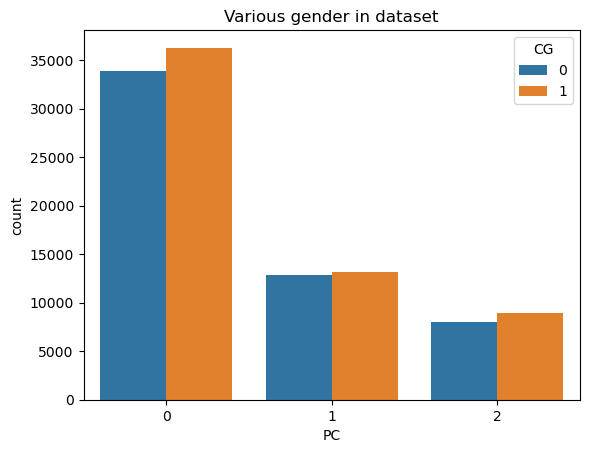

In [116]:
# sns.countplot(x=df3['PC'])
sns.countplot(data = df3, x ='PC',hue='CG')
plt.title('Various gender in dataset')
plt.show()

In [100]:
from sklearn.ensemble import RandomForestClassifier

In [121]:
classifier_rf = RandomForestClassifier(random_state=42,n_estimators=100)
classifier_rf.fit(x_train,y_train)

C:\Users\10725880\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [123]:
y_pred = classifier_rf.predict(x_test)

np.unique(y_pred)


array([1])

In [127]:
y_pred = classifier_rf.predict(df3[["PC"]])
df3["PC"] = label_encoder.fit_transform(df['Customer_Gender'])
label_encoder.inverse_transform(y_pred)

array(['M', 'M', 'M', ..., 'M', 'M', 'M'], dtype=object)

In [128]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [139]:
from sklearn.metrics import classification_report


accuracy = accuracy_score(y_test, x_test)
c_matrix = classification_report(y_test, x_test)
print("Accuracy : {:2f}%".format(accuracy*100))

Accuracy : 41.623662%


C:\Users\10725880\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\10725880\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\10725880\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [140]:
print(c_matrix)

              precision    recall  f1-score   support

           0       0.48      0.62      0.54     16421
           1       0.50      0.23      0.31     17490
           2       0.00      0.00      0.00         0

    accuracy                           0.42     33911
   macro avg       0.33      0.28      0.28     33911
weighted avg       0.49      0.42      0.42     33911

